In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

g = nx.Graph()
tweets = pd.read_csv("tweets.csv")
users = pd.read_csv("users.csv")
trolls = set()
for index, user in users.iterrows():
    trolls.add(user["screen_name"].lower())
for index, tweet in tweets.iterrows():
    text = tweet["text"]
    user = tweet["user_key"]
    if (not (text is np.nan)) and text.startswith("RT @") and user in trolls:
        source = text[4 : text.find(":")].lower()
        if source in trolls:
            g.add_edge(user, source)
len(g)


236

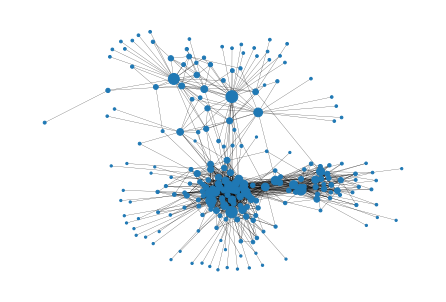

In [47]:
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G: nx.Graph = g.subgraph(Gcc[0]).copy()
G.remove_edges_from(nx.selfloop_edges(G))
pr = nx.algorithms.link_analysis.pagerank_alg.pagerank(G)
size = [pr[n]*5000 for n in G.nodes]
nx.draw(G, node_size=size, width=0.2)

In [66]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)

In [68]:
top_level_communities = next(communities_generator)
print(len(top_level_communities))

4


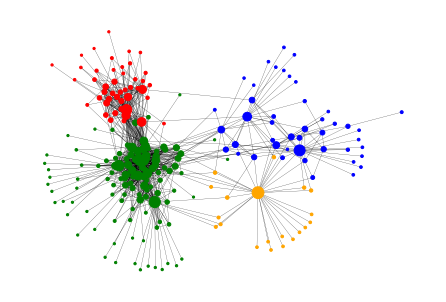

In [70]:
colors = ['blue', 'green','red','orange','yellow']
color_map = []
for node in g:
    for i,s in enumerate(top_level_communities):
        if node in s:
            color_map.append(colors[i])
nx.draw(G, node_color=color_map, node_size=size, width=0.2)

In [44]:
pr = dict(sorted(pr.items(), key=lambda item: item[1], reverse=True))
from itertools import islice

def take(n, iterable):
    return list(islice(iterable, n))
take(100, pr.items())

[('hiimkhloe', 0.02789460184026281),
 ('ten_gop', 0.025256956358479576),
 ('melanymelanin', 0.02397443281523521),
 ('giselleevns', 0.021856872979435792),
 ('lazykstafford', 0.021300479301257766),
 ('_nickluna_', 0.016668415098132976),
 ('michellearry', 0.016616706813362865),
 ('c__wells', 0.015622012650243029),
 ('malloryjared', 0.015106309644300394),
 ('danageezus', 0.01490835294625719),
 ('jeannemccarthy0', 0.014675631491047612),
 ('judelambertusa', 0.014367151571129055),
 ('chrixmorgan', 0.013563776443424325),
 ('evagreen69', 0.012912077579045295),
 ('melvinsroberts', 0.012882965514481537),
 ('heyits_toby', 0.012287136411092112),
 ('priceforpierce', 0.012279461064342424),
 ('jenn_abrams', 0.01211078543852791),
 ('thefoundingson', 0.011754891721991205),
 ('jeffreykahunas', 0.011332621507560033),
 ('pamela_moore13', 0.011253822683047343),
 ('emileewaren', 0.011154278831217715),
 ('laurabaeley', 0.01108408574778579),
 ('puredavie', 0.010658635547407246),
 ('mil0blake', 0.01059996424923

In [25]:
trolls = set()
posted = {}
retweeted = {}
for index, user in users.iterrows():
    trolls.add(user["screen_name"].lower())
    posted[user["screen_name"].lower()] = 0
    retweeted[user["screen_name"].lower()] = 0
for index, tweet in tweets.iterrows():
    text = tweet["text"]
    user = tweet["user_key"]
    if (not (text is np.nan)) and user in trolls:
        if text.startswith("RT @"):
            retweeted[user]+=1
        else:
            posted[user]+=1

total = []
for user in trolls:
    total.append((posted[user], retweeted[user],posted[user]+retweeted[user]))



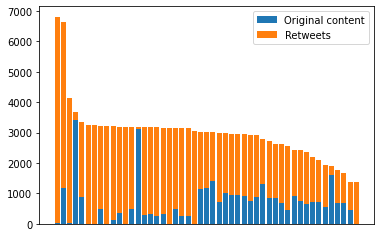

In [32]:
fig, ax = plt.subplots()

sorted_by_total = sorted(total, key=lambda tup: tup[2], reverse=True)[1:50]
pst = [pst for pst, _,_ in sorted_by_total]
ret = [ret for _, ret,_ in sorted_by_total]
lab = [i for i in range(0,len(pst))]
width = 0.8
ax.bar(lab, pst, width, label='Men')
ax.bar(lab, ret, width, bottom=pst,
       label='Women')
ax.legend(["Original content", "Retweets"])
ax.xaxis.set_visible(False)

plt.show()

In [35]:
from textblob import TextBlob
import re

sentiment = []
def clean_text(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ", text).split())

for index, tweet in tweets.iterrows():
    text = tweet["text"]
    user = tweet["user_key"]
    if (not (text is np.nan)) and not text.startswith("RT @") and user in trolls:
        sentiment.append(TextBlob(clean_text(text)).sentiment.polarity)

In [43]:
sents = [0,0,0,0,0,0]

for sent in sentiment:
    if sent <= -0.75:
        sents[0]+=1
    elif sent >= -0.75 and sent < -0.5:
        sents[1]+=1
    elif sent >= -0.5 and sent < 0:
        sents[2]+=1
    elif sent >= 0 and sent < 0.5:
        sents[3]+=1
    elif sent >= 0.5 and sent < 0.75:
        sents[4]+=1
    elif sent >= 0.75:
        sents[5]+=1

sents = [0,0,0,0,0,0]

for sent in sentiment:
    if sent <= -0.66:
        sents[0]+=1
    elif sent >= -0.66 and sent < -0.33:
        sents[1]+=1
    elif sent >= -0.33 and sent < 0:
        sents[2]+=1
    elif sent >= 0 and sent < 0.33:
        sents[3]+=1
    elif sent >= 0.33 and sent < 0.66:
        sents[4]+=1
    elif sent >= 0.66:
        sents[5]+=1



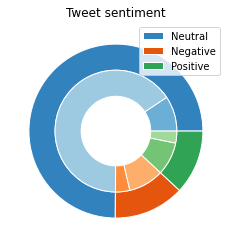

In [48]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[sents[2], sents[3]], [sents[1], sents[2]], [sents[4], sents[5]]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Tweet sentiment')
ax.legend(["Neutral", "Negative","Positive"])
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

trump_head = np.array(Image.open("head.png"))
stopwords = set(STOPWORDS) | {'t', 'co', 'https', 'realDonaldTrump', 'RT', 'amp', 's', 'u', 'will', 'M', 'Trump'}

wordcloud = WordCloud(width = 6000,max_words=98, height = 4000, random_state=1, background_color='#013777',
                      colormap='Pastel1', collocations=False, stopwords = stopwords, mask=trump_head)
wordcloud.generate(' '.join(tweets['text']))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()